# K-Means Clustering

K-Means clustering adalah metode yang akan mengcluster data yang tanpa label, menjadi data berlabel sejumlah k-cluster. K-Means adalah salah satu algoritma machine learning yang termasuk kedalam kategori Unsupervised Learning, karena data yang ada pada metode ini tidak diketahui nilai aslinya.

## Readme

Untuk menjalankan program ini, pastikan telah menginstall library berikut ini:
    1. Pandas
    2. Numpy
    3. Sci-Kit Learn
    4. Matplotlib

Untuk menjalankan:
    1. Load data
    2. Buat objek K_Means dengan parameter jumlah 'k'
    3. Lakukan metode "fit" pada kelas K_Means
    4. Lakukan metode "fit" pada kelas K_Means_Predict
    5. Selesai

### Langkah Pertama : Pahami dataset

Import keperluan library untuk mengolah dan menampilkan dataset

In [1]:
import pandas as pd

Meload data dan mengubah data nya ke numpy array

In [2]:
dataTrain = pd.read_csv('TrainingSet.txt', delimiter='\t').as_matrix()
dataTrain

array([[21.3 , 20.8 ],
       [20.15, 20.9 ],
       [19.2 , 21.35],
       ...,
       [ 8.8 , 11.4 ],
       [ 9.  , 10.9 ],
       [ 9.35, 10.5 ]])

Melakukan visualisasi data dengan pyplot

Text(0,0.5,'y')

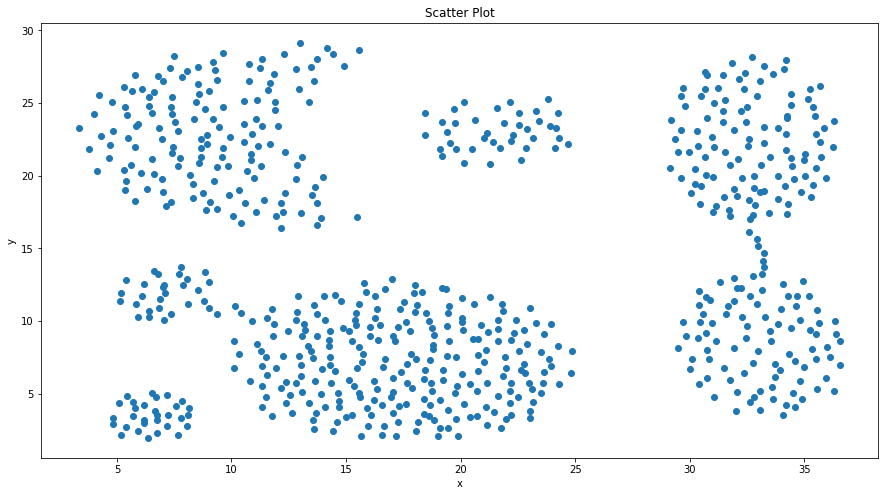

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15, 8))
plt.scatter(dataTrain[:,0],dataTrain[:,1]) # dataTrain[:,0] mengambil kolom X, sedangkan [:,1] mengambil kolom Y
plt.title('Scatter Plot')
plt.xlabel('x')
plt.ylabel('y')

Hasil datasetnya adalah seperti di tabel scatter plot diatas, sekilas terlihat terdapat 7 cluster data

## Menentukan jumlah cluster menggunakan Elbow Method

Menggunakan Library Sci-Kit Learn untuk membantu menentukan jumlah cluster

Text(0,0.5,'SSE')

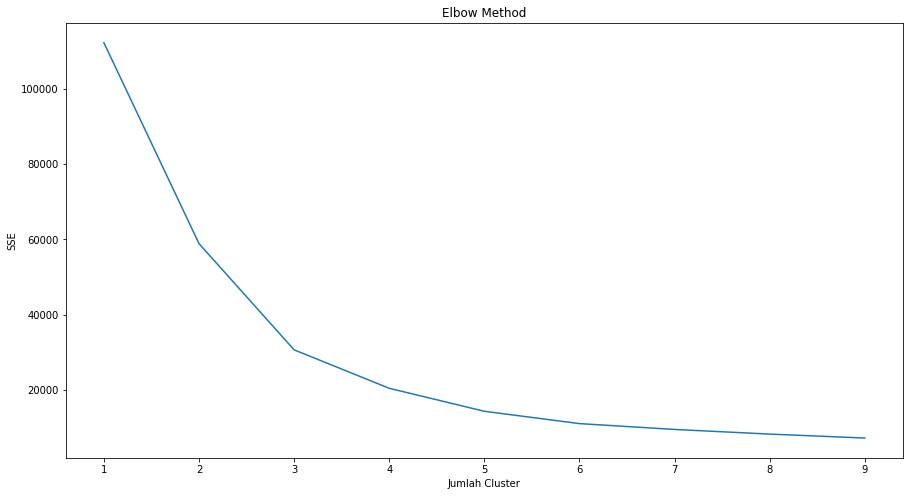

In [4]:
from sklearn.cluster import KMeans
sse = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init ='k-means++', max_iter = 300, n_init = 10, random_state =0)
    kmeans.fit(dataTrain)
    sse.append(kmeans.inertia_)
plt.figure(figsize=(15,8))
plt.plot(range(1,10), sse)
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('SSE')

Dari hasil plotting diatas, dapat dilihat bahwa titik 'elbow' yang terlihat cukup jelas adalah 3, oleh karena itu, dengan mempercayai library k-means yang dibuat oleh sci-kit, diputuskan menggunakan k = 3

## Membangun K-Means tanpa library

In [5]:
# Mengimport library library yang diperlukan
import numpy as np
from collections import defaultdict
from random import randint as rand

# Pengimplementasian K-Means Algorithm dengan melakukan pendekatan OOP. 
class K_Means(object):
    last_cent = None
    
    def __init__(self, K):
        self.K = K
    
    @staticmethod
    def new_centroids(clusters):
        """
        Fungsi ini akan mengembalikan centroid yang terbaru setelah menghitung
        rata-rata dari setiap cluster
        """
        return [np.mean(i, axis=0) for i in clusters.values()]
    
    @classmethod
    def clustering(cls, clusters, data, rd_points):
        """
        Fungsi ini akan memasukan data kedalam kelompok cluster masing-masing
        """
        for i in data:
            clusters[cls.lable(data_point=i, points=rd_points)].append(i)
        return
    
    @classmethod 
    def lable(cls, data_point, points):
        """
        Fungsi ini akan mengembalikan label dari data point
        """
        values = [cls.euclid_dis(data_point, i) for i in points]
        return min(range(len(values)), key=values.__getitem__)
    
    def pred_lable(cls, data_point, points):
        """
        Fungsi ini akan mengembalikan label hasil prediksi
        """
        values = [cls.euclid_dis(data_point, i) for i in points]
        return min(range(len(values)), key=values.__getitem__)
    
    @classmethod
    def centroids(cls, data, K):
        """
        Memilih centroid sebanyak K dengan memilih nya dari index
        dan dijadikan sebagai centroid
        """
        mean_p = np.mean(data, axis=0)
        dist_log = []
        result = []
        while len(result) < K:
            if not dist_log:
                p = data[rand(0, K - 1)]
                result.insert(0, p)
                dist_log.insert(0, cls.euclid_dis(mean_p, p))
            else:
                for i in data:
                    p = i
                    if np.any(result == p):
                        continue
                    d = cls.euclid_dis(p, result[0])
                    if d > dist_log[0]:
                        result.insert(0, p)
                        dist_log.insert(0, cls.euclid_dis(mean_p, p))
                        break
        return result    
        
    @staticmethod
    def euclid_dis(a, b):
        """
        Menghitung jarak dengan fungsi norm dari numpy untuk menghitung euclidean distance
        """
        return np.linalg.norm(a - b)
        
    def fit(self, data):
        """
        Fungsi utama yang akan mengembalikan label data
        """
        # Menginisialisasi centroid secara acak
        rd_points = K_Means.centroids(data, K=self.K)
        
        # Inisialisasi variabel yang digunakan untuk pengecekan
        counter = False
        clusters = None
        change_log = []
        list_centroid = []
        iteration = 0
        # Inisialisasi looping utama
        while counter is False:
            # Kita akan menyimpan setiap cluster di suatu list
            clusters = defaultdict(list)
            
            # Memasukan data ke tiap-tiap cluster berdasarkan centroids
            K_Means.clustering(clusters, data, rd_points)
             
            # Mengganti centroid berdasarkan rata-rata cluster
            rd_points = K_Means.new_centroids(clusters)
            list_centroid.append(rd_points)
            # Melakukan pengecekan apakah terdapat titik yang berbeda di cluster
            temp = [len(i) for i in clusters.values()]
            if not change_log:
                change_log = temp
            else:
                if temp == change_log:
                    counter = True
                else:
                    change_log = temp
            iteration += 1
        self.points = rd_points
        self.data = data
        self.last_cent = list_centroid[-1]
    
    def predict(self, data):
        """
        Fungsi utama yang akan mengembalikan label data
        """
        # Menginisialisasi centroid dari centroid terakhir yang didapat
        rd_points = self.last_cent
        
        # Inisialisasi variabel yang digunakan untuk pengecekan
        clusters = None
        change_log = []
        iteration = 0
        # Inisialisasi looping utama
        for i in range(len(data)):
            # Kita akan menyimpan setiap cluster di suatu list
            clusters = defaultdict(list)
            
            # Memasukan data ke tiap-tiap cluster berdasarkan centroids
            K_Means.clustering(clusters, data, rd_points)
             
        self.points = rd_points
        self.data = data

    def get_final_centroid(self):
        return last_cent
        
    def labels(self):
        """
        Fungsi ini akan mengembalikan label dari setiap data yang ada di dataset
        """
        r = []
        for i in self.data:
            r.append(K_Means.lable(i, self.points))
        return np.array(r)
        
    def labels_pred(self):
        """
        Fungsi ini akan mengembalikan label dari setiap data yang ada di dataset
        """
        r = []
        for i in self.data:
            r.append(K_Means.pred_lable(i, self.points))
        return np.array(r)

## Membuat kelas untuk memprediksi

Kelas ini sama percis dengan kelas K_Means, namun perbedaanya disini untuk mencari model nya menggunakan centroid terakhir yang telah dicari pada saat model melakukan training

In [6]:
class K_Means_Predict(object):
    
    @staticmethod
    def new_centroids(clusters):
        """
        Fungsi ini akan mengembalikan centroid yang terbaru setelah menghitung
        rata-rata dari setiap cluster
        """
        return [np.mean(i, axis=0) for i in clusters.values()]
    
    @classmethod
    def clustering(cls, clusters, data, rd_points):
        """
        Fungsi ini akan memasukan data kedalam kelompok cluster masing-masing
        """
        for i in data:
            clusters[cls.lable(data_point=i, points=rd_points)].append(i)
        return
    
    @classmethod 
    def lable(cls, data_point, points):
        """
        Fungsi ini akan mengembalikan label dari data point
        """
        values = [cls.euclid_dis(data_point, i) for i in points]
        return min(range(len(values)), key=values.__getitem__)
    
    def pred_lable(cls, data_point, points):
        """
        Fungsi ini akan mengembalikan label hasil prediksi
        """
        values = [cls.euclid_dis(data_point, i) for i in points]
        return min(range(len(values)), key=values.__getitem__)
    
    @classmethod
    def centroids(cls, data, K):
        """
        Memilih centroid sebanyak K dengan memilih nya dari index
        dan dijadikan sebagai centroid
        """
        mean_p = np.mean(data, axis=0)
        dist_log = []
        result = []
        while len(result) < K:
            if not dist_log:
                p = data[rand(0, K - 1)]
                result.insert(0, p)
                dist_log.insert(0, cls.euclid_dis(mean_p, p))
            else:
                for i in data:
                    p = i
                    if np.any(result == p):
                        continue
                    d = cls.euclid_dis(p, result[0])
                    if d > dist_log[0]:
                        result.insert(0, p)
                        dist_log.insert(0, cls.euclid_dis(mean_p, p))
                        break
        return result    
        
    @staticmethod
    def euclid_dis(a, b):
        """
        Menghitung jarak dengan fungsi norm dari numpy untuk menghitung euclidean distance
        """
        return np.linalg.norm(a - b)
        
    def fit(self, data, centroid):
        """
        Fungsi utama yang akan mengembalikan label data
        """
        # Menginisialisasi centroid secara acak
        rd_points = centroid
        
        # Inisialisasi variabel yang digunakan untuk pengecekan
        counter = False
        clusters = None
        change_log = []
        list_centroid = []
        iteration = 0
        # Inisialisasi looping utama
        for i in range(len(data)):
            # Kita akan menyimpan setiap cluster di suatu list
            clusters = defaultdict(list)
            
            # Memasukan data ke tiap-tiap cluster berdasarkan centroids
            K_Means.clustering(clusters, data, rd_points)
             
            # Mengganti centroid berdasarkan rata-rata cluster
            rd_points = K_Means.new_centroids(clusters)
            list_centroid.append(rd_points)
        self.points = rd_points
        self.data = data
        self.last_cent = list_centroid[-1]
    
    def predict(self, data):
        """
        Fungsi utama yang akan mengembalikan label data
        """
        # Menginisialisasi centroid dari centroid terakhir yang didapat
        rd_points = self.last_cent
        
        # Inisialisasi variabel yang digunakan untuk pengecekan
        clusters = None
        change_log = []
        iteration = 0
        # Inisialisasi looping utama
        for i in range(len(data)):
            # Kita akan menyimpan setiap cluster di suatu list
            clusters = defaultdict(list)
            
            # Memasukan data ke tiap-tiap cluster berdasarkan centroids
            K_Means.clustering(clusters, data, rd_points)
             
        self.points = rd_points
        self.data = data

    def get_final_centroid(self):
        return last_cent
        
    def labels(self):
        """
        Fungsi ini akan mengembalikan label dari setiap data yang ada di dataset
        """
        r = []
        for i in self.data:
            r.append(K_Means.lable(i, self.points))
        return np.array(r)


In [7]:
def warna(x):
    """
    Fungsi ini akan mengembalikan char kode warna untuk setiap input integer
    """
    return {
        0 : 'r',
        1 : 'g',
        2 : 'b',
        3 : 'c',
        4 : 'y',
        5 : 'm',
        6 : 'k',
    }[x]

## Melakukan plotting data train dengan K = 3

[array([10.84157303, 22.50730337]), array([32.30763889, 16.43263889]), array([15.48520408,  7.14098639])]


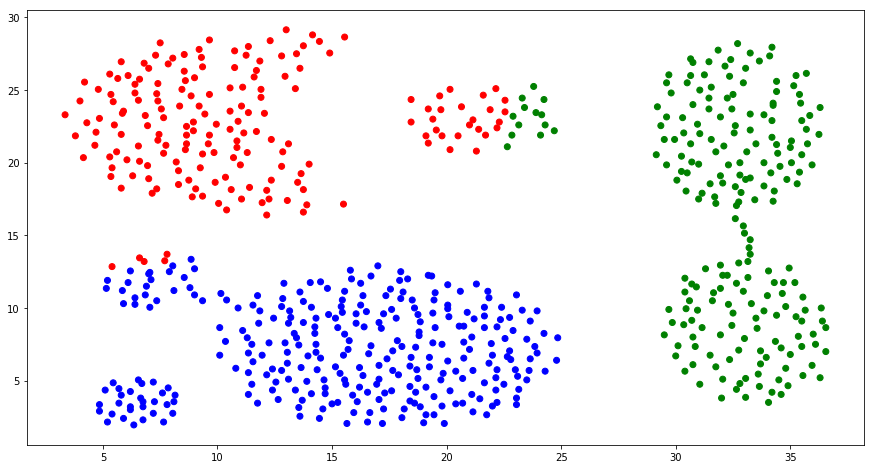

In [8]:
# Membuat objek model K-Means dengan K = 3
model = K_Means(3)
# Melakukan pembuatan model
model.fit(dataTrain)
# Menampung label hasil training
labels = model.labels()
# Mengubah label yang terdiri dari integer menjadi char r/g/b/c/m/y/k
labelColorTrain = []
for l in labels:
    labelColorTrain.append(warna(l))
print(model.last_cent)
# Memplot hasil
plt.figure(figsize=(15, 8))
plt.scatter(dataTrain[:,0], dataTrain[:,1], c=labelColorTrain)
plt.show()

Dapat dilihat di figure diatas, bahwa hasil plotnya cukup meyakinkan, karena dengan memilih k=3, kita memiiki area-area yang jelas terlihat batasnya, walaupun terlihat ada data-data yang terpisah mejadi cluster tersendiri, namun penulis masih yakin bahwa K yang tepat adalah 3, karena dengan memilih 3 cluster, hasilnya terlihat cukup konsisten walaupun telah beberapa kali di lakukan training.

## Membandingkan hasil plot dengan data test

Meload data dan mengubah data nya ke numpy array

In [9]:
dataTest = pd.read_csv('TestSet.txt', delimiter='\t').as_matrix()
dataTrain

array([[21.3 , 20.8 ],
       [20.15, 20.9 ],
       [19.2 , 21.35],
       ...,
       [ 8.8 , 11.4 ],
       [ 9.  , 10.9 ],
       [ 9.35, 10.5 ]])

## Visualisasi data test

Text(0,0.5,'y')

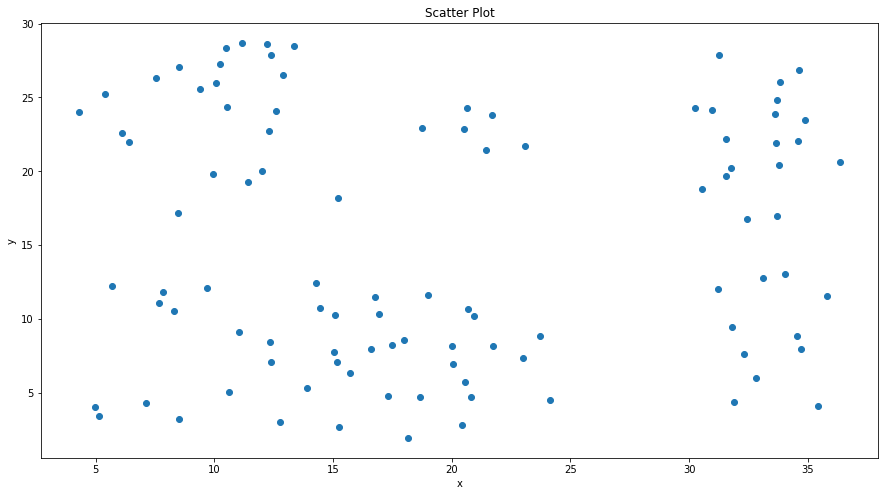

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15, 8))
plt.scatter(dataTest[:,0],dataTest[:,1]) # dataTrain[:,0] mengambil kolom X, sedangkan [:,1] mengambil kolom Y
plt.title('Scatter Plot')
plt.xlabel('x')
plt.ylabel('y')

Datanya cukup teracak, namun setelah melihat pengelompokan cluster yang telah dilakukan pada saat training, data ini dapat terlihat cukup jelas terbagi menjadi 3 cluster

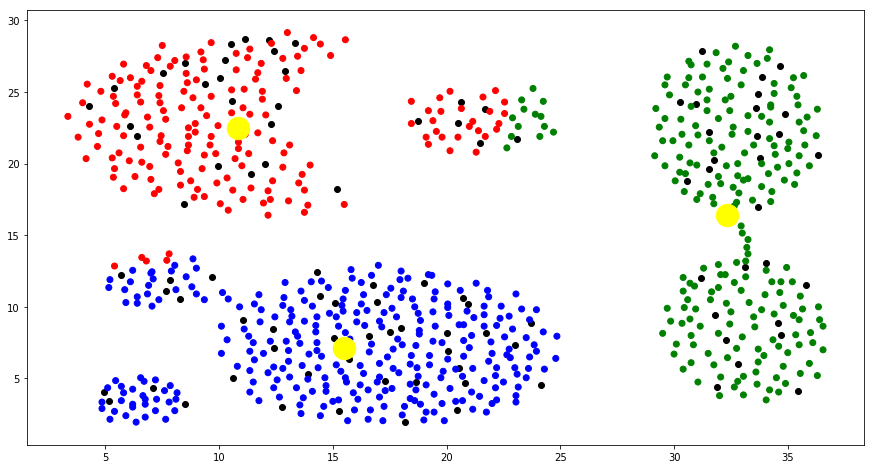

In [11]:
def get_koor_cen(centroid):
    cent_x = []
    cent_y = []
    for i in range(len(centroid)):
        cent_x.append(centroid[i][0])
        cent_y.append(centroid[i][1])
    return cent_x, cent_y

cent_x, cent_y = get_koor_cen(model.last_cent)
plt.figure(figsize=(15, 8))
plt.scatter(dataTest[:,0],dataTest[:,1], c='black')
plt.scatter(dataTrain[:,0], dataTrain[:,1], c=labelColorTrain)
plt.scatter(cent_x, cent_y, c='yellow', marker='o', s=500)

Berikut ini adalah hasil plotingan data test terhadap data train yang telah dikelompokkan, dapat terlihat secara cukup jelas pengelompokan data-data nya, titik yang berwarna hitam adalah data test, yang berwarna adalah data train yang sudah dikelompokkan, sedangkan bintang berwarna kuning adalah titik pusat untuk suatu cluster.

## Melakukan prediksi data test

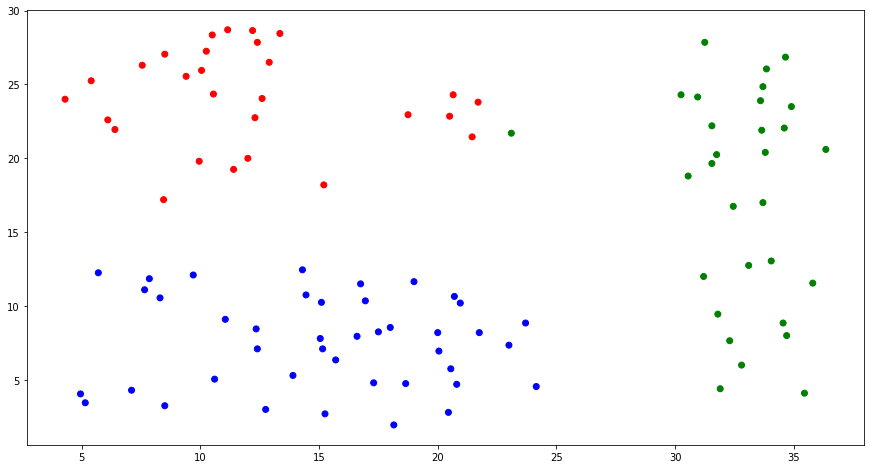

In [12]:
model_pred = K_Means_Predict()
model_pred.fit(dataTest, model.last_cent)
labels_test = model_pred.labels()
labelColorTest = []
for l in labels_test:
    labelColorTest.append(warna(l))
# Memplot hasil
plt.figure(figsize=(15, 8))
plt.scatter(dataTest[:,0], dataTest[:,1], c=labelColorTest)


Berikut ini adalah label-label data yang didapat

In [13]:
print(dataTest[0][0],dataTest[0][1])
print(dataTest[1][0],dataTest[1][1])

18.75 22.95
21.45 21.45


## Menuliskan hasil label yang telha didapat kedalam file txt

In [14]:
print(labels_test)
f=open("HasilPrediksi.txt", "w+")
f.write('x\ty\n')
for i in range(100):
    f.write("%s\t%s\t%s\r\n" % (dataTest[i][0], dataTest[i][1],labels_test[i]))
f.close()

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2]


## Menggabungkan plot hasil training dengan hasil testing

Untuk melihat hasil secara keseluruhan, akan dilakukan penggabungan plot data training dan data testing

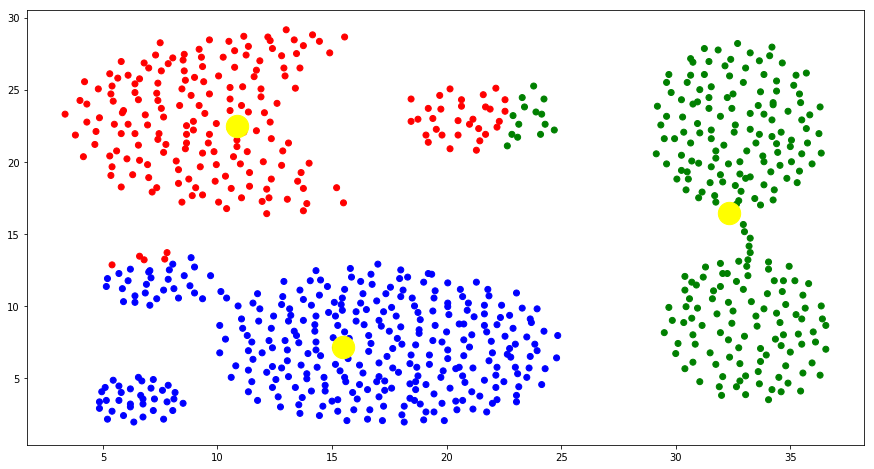

In [15]:
plt.figure(figsize=(15, 8))
plt.scatter(dataTrain[:,0], dataTrain[:,1], c=labelColorTrain)
plt.scatter(dataTest[:,0], dataTest[:,1], c=labelColorTest)
plt.scatter(cent_x, cent_y, c='yellow', marker='o', s=500)

Dari data yang telah diplotting, dapat dilihat bahwa kluster yang terbentuk cukup memuaskan, karena tidak terdapat data pencilan.

## Kesimpulan

Dengan dipilihnya K = 3, hasil cukup memuaskan, walaupun bersifat sangat subjektif, tapi saya yakin dengan pilihan ini, mengapa? Karena pada elbow method, bukan hanya dipilih K yang memiliki SSE terendah, tapi juga K yang mengalami penurunan signifikan, dan K yang mengalamai penurunan paling signifikan adalah pada saat K nya bertambah dari 2 ke 3.